![Imgur](https://i.imgur.com/h4PPC71.png)
#**18-modul. Amaliyot. Customer Churn**
# 18.6. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifa orqali data sayns jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega boʻlasiz.

#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###**ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [209]:
import pandas as pd
import numpy as np
import sklearn

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [210]:
df.shape

(10000, 13)

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [212]:
encoded = pd.get_dummies(df)
encoded.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1,...,False,False,False,False,False,True,False,False,True,False
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,...,False,False,False,False,False,False,False,True,True,False
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,...,False,False,False,False,False,True,False,False,True,False
4,15701354,699,39,1,0.00,2,0,0,93826.63,0,...,False,False,False,False,False,True,False,False,True,False
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,...,False,False,False,False,False,False,False,True,True,False


In [213]:
for col in encoded.select_dtypes(include='bool').columns:
    encoded[col] = encoded[col].astype(int)

encoded.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,1,0,0,1,0
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,1,1,0
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,1,0,0,1,0
4,15701354,699,39,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,1,0,0,1,0
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,1,1,0


In [214]:
X = encoded.drop("Exited", axis=1)
y = encoded['Exited']

In [215]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1593
           1       0.34      0.29      0.32       407

    accuracy                           0.74      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.73      0.74      0.73      2000


Model aniqligi: 0.742




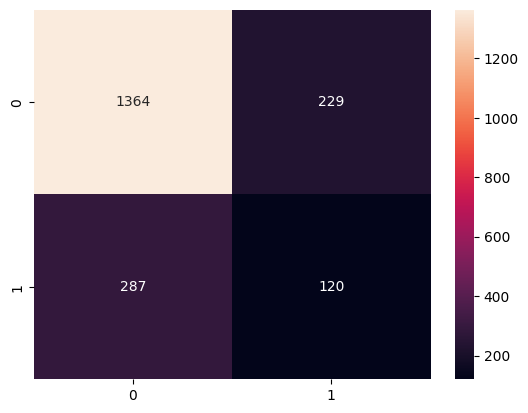

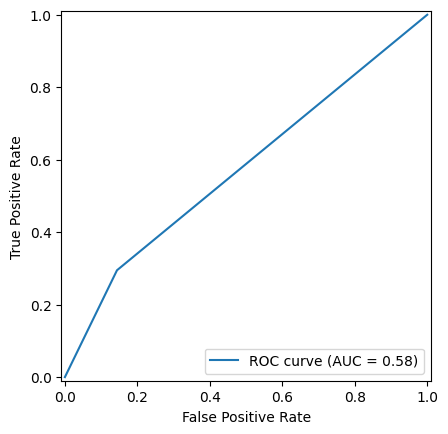

In [217]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# precision    recall  f1-score   support bular bo'yicha aniqligini chiqaradi
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred))
print("\n")
# Modelni umumiy aniqligi aniqlandi yani 74%

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display_viz = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display_viz.plot()
plt.show()

## Yuqorida hech qanday tahrirlash ishlarisiz predict qilgan edik 74% aniqlikda chiqdi pastda qaytadan malumotlarni tayyorlab chiqaramiz

mijoz identifikatori (RowNumber, CustomerId, Surname);

geografik joylashuvi (Geography);

jinsi (Gender);

yoshi (Age);

kredit balli (CreditScore);

yillik daromadi (EstimatedSalary);

bankda qancha vaqtdan beri mijoz ekani (Tenure);

qancha mahsulotdan foydalanishi (NumOfProducts);

faoliyati (HasCrCard, IsActiveMember);

balans (Balance);

prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

In [218]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [219]:
df.shape

(10000, 14)

# **Ma'lumotlarni tayyorlash**

In [220]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Bazi keraksiz ustunlarni o'chiramiz

In [221]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Biz uchun muhim ustun bu **Exited** ustuni, aynan shu ustun label (yani bashorat qilinuvchi klass) vazifasini bajaradi

In [223]:
df['Exited'].value_counts()/len(df)*100

# Bunda foiz ko'rinishida chiqarildi

,count
Exited,
0,79.63
1,20.37


In [224]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


## **Bundan ko'rinib turibduki:**

## 7963 ta mijoz ban xizmatidan foydalangan (qolgan)

## 2037 ta mijoz bank xizmatidan qaytib foydalanmagan

## Bularning nisbatini diagramma ko'rinishida ko'ramiz

In [225]:
Exited_pie = df['Exited'].value_counts()/len(df)*100

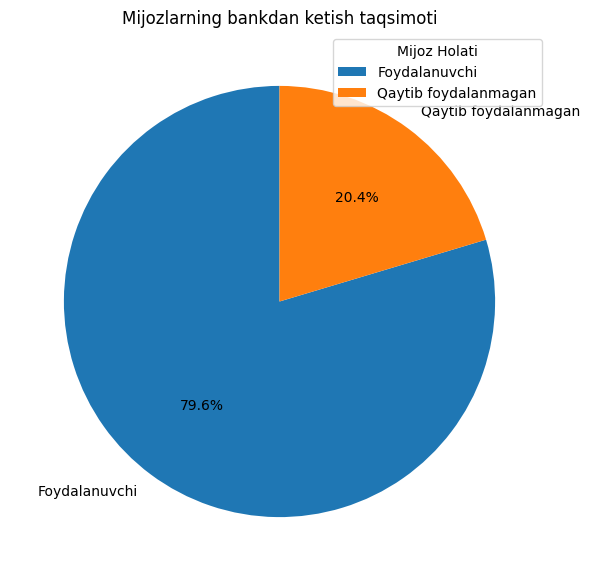

In [226]:
plt.figure(figsize=(7,7))
plt.pie(Exited_pie, labels=['Foydalanuvchi','Qaytib foydalanmagan'], autopct='%1.1f%%', startangle=90)
plt.title('Mijozlarning bankdan ketish taqsimoti')
plt.legend(title="Mijoz Holati")
plt.show()

## Bazi sonli ustunlarni tahlil qilamiz

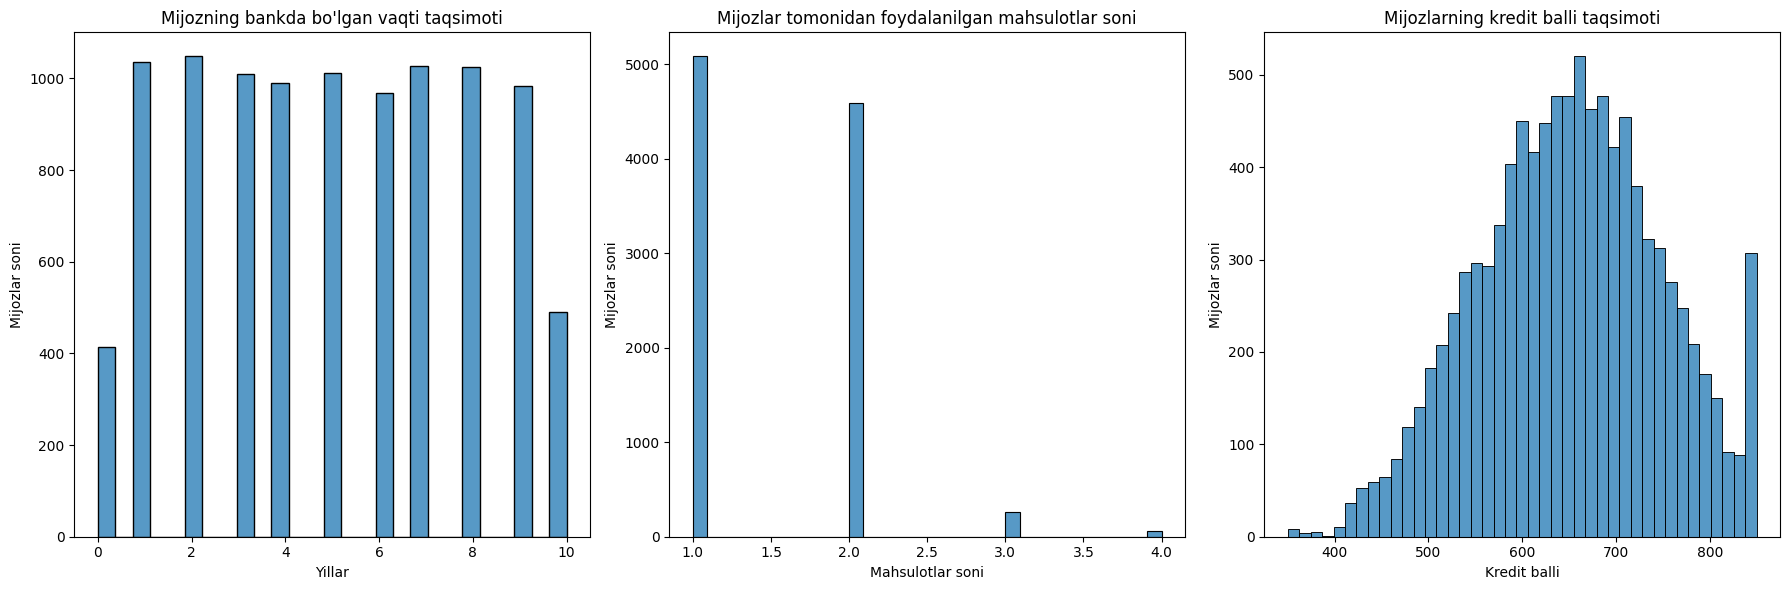

In [227]:
fig, axes = plt.subplots(1,3, figsize=(18,6))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijozning bankda bo'lgan vaqti taqsimoti")
axes[0].set_xlabel("Yillar")
axes[0].set_ylabel("Mijozlar soni")

# NumOfProducts
sns.histplot(x="NumOfProducts", data=df, ax=axes[1])
axes[1].set_title("Mijozlar tomonidan foydalanilgan mahsulotlar soni")
axes[1].set_xlabel("Mahsulotlar soni")
axes[1].set_ylabel("Mijozlar soni")

# CreditScore
sns.histplot(x="CreditScore", data=df, ax=axes[2])
axes[2].set_title("Mijozlarning kredit balli taqsimoti")
axes[2].set_xlabel("Kredit balli")
axes[2].set_ylabel("Mijozlar soni")

plt.tight_layout()
plt.show()

## Kategorik xususiyatlar countplot orqali tasvirlandi

## Gender, IsActiveMember va NumOfProducts ustunlarining Exited bilan bog'liqligini ko'rsatuvchi countplot.


/tmp/ipython-input-221703764.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Gender', hue="Exited", palette=sns.color_palette('pastel'), data=df, ax=axes[0])


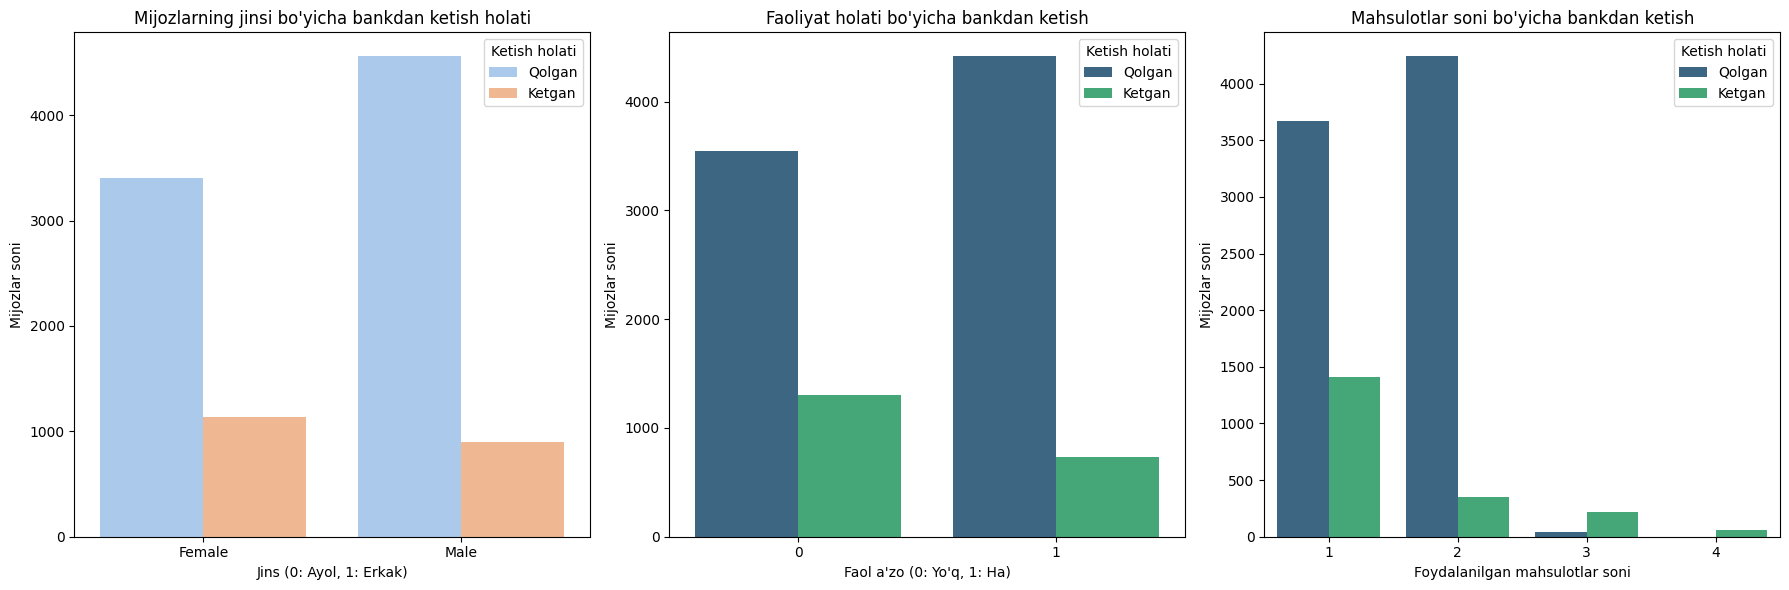

In [228]:
fig, axes = plt.subplots(1,3, figsize=(18,6))

# Gender
sns.countplot(x='Gender', hue="Exited", palette=sns.color_palette('pastel'), data=df, ax=axes[0])
axes[0].set_title("Mijozlarning jinsi bo'yicha bankdan ketish holati")
axes[0].set_xlabel("Jins (0: Ayol, 1: Erkak)")
axes[0].set_ylabel("Mijozlar soni")
axes[0].legend(title="Ketish holati", labels=['Qolgan', 'Ketgan'])

# IsActiveMember
sns.countplot(x='IsActiveMember', hue="Exited", palette="viridis", data=df, ax=axes[1])
axes[1].set_title("Faoliyat holati bo'yicha bankdan ketish")
axes[1].set_xlabel("Faol a'zo (0: Yo'q, 1: Ha)")
axes[1].set_ylabel("Mijozlar soni")
axes[1].legend(title="Ketish holati", labels=['Qolgan', 'Ketgan'])

# NumOfProducts
sns.countplot(x="NumOfProducts", hue='Exited', palette="viridis", data=df, ax=axes[2])
axes[2].set_title("Mahsulotlar soni bo'yicha bankdan ketish")
axes[2].set_xlabel("Foydalanilgan mahsulotlar soni")
axes[2].set_ylabel("Mijozlar soni")
axes[2].legend(title="Ketish holati", labels=['Qolgan', 'Ketgan'])

plt.tight_layout()
plt.show()

## 'Age' va 'Balance' bo'yicha tahlil qilamiz

## 'Age' va 'Balance' kabi muhim sonli xususiyatlarning mijozlarning bankdan ketishiga ('Exited') qanday ta'sir qilishi boxplot orqali tasvirlandi.

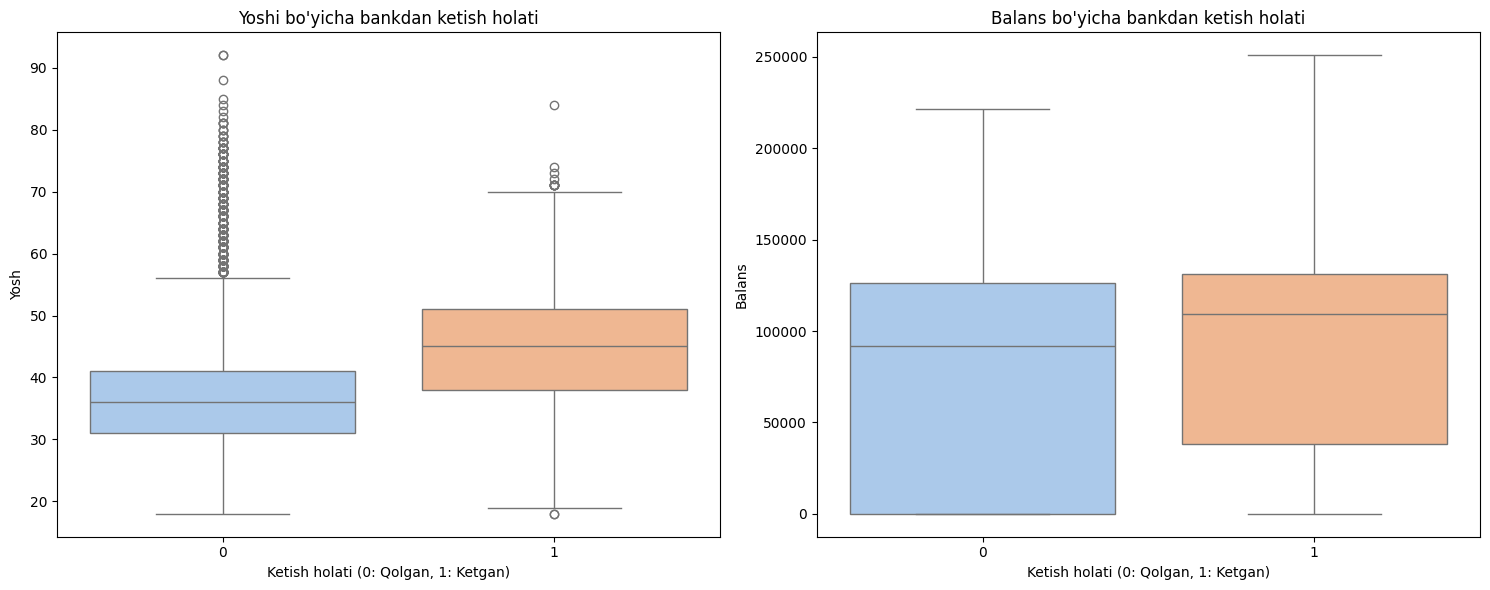

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Age vs Exited
sns.boxplot(x='Exited', y='Age', data=df, ax=axes[0], hue='Exited', palette=sns.color_palette('pastel', 2), legend=False)
axes[0].set_title("Yoshi bo'yicha bankdan ketish holati")
axes[0].set_xlabel("Ketish holati (0: Qolgan, 1: Ketgan)")
axes[0].set_ylabel("Yosh")

# Balance vs Exited
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1], hue='Exited', palette=sns.color_palette('pastel', 2), legend=False)
axes[1].set_title("Balans bo'yicha bankdan ketish holati")
axes[1].set_xlabel("Ketish holati (0: Qolgan, 1: Ketgan)")
axes[1].set_ylabel("Balans")

plt.tight_layout()
plt.show()

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Matnli ustunlarni intigerga o'tkazamiz

In [231]:
# from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'].values)
df['Gender'] = encoder.fit_transform(df['Gender'].values)
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6644,556,1,1,33,3,124213.36,2,1,0,62627.55,0
3525,625,1,1,31,4,77743.01,2,1,0,75335.68,0
7924,833,0,1,47,2,0.00,2,1,1,182247.77,0
8750,655,0,0,32,2,0.00,1,1,1,71047.51,0
2940,711,2,0,28,5,0.00,2,1,1,93959.96,0
6637,850,0,1,36,3,0.00,2,1,0,195033.07,0
7649,715,0,0,31,3,110581.29,1,1,1,94715.24,0
5189,826,2,1,41,5,146466.46,2,0,0,180934.67,0
3608,677,0,0,36,7,0.00,1,1,0,47318.75,0
8139,792,0,1,30,1,127187.86,1,1,1,113553.42,0


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


## Korrelyatsiyasini tekshiramiz

In [233]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,0.002857,0.003965,0.000842,0.006268,0.012238,0.005458,0.025651,0.001384,0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,0.008523,0.006724,0.001369,0.035943
Gender,0.002857,0.004719,1.000000,0.027544,0.014733,0.012087,0.021859,0.005766,0.022544,0.008112,0.106512
Age,0.003965,0.022812,0.027544,1.000000,0.009997,0.028308,0.030680,0.011721,0.085472,0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,0.009997,1.000000,0.012254,0.013444,0.022583,0.028362,0.007784,0.014001
Balance,0.006268,0.069408,0.012087,0.028308,0.012254,1.000000,0.304180,0.014858,0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,0.021859,0.030680,0.013444,0.304180,1.000000,0.003183,0.009612,0.014204,0.047820
HasCrCard,0.005458,0.008523,0.005766,0.011721,0.022583,0.014858,0.003183,1.000000,0.011866,0.009933,0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,0.028362,0.010084,0.009612,0.011866,1.000000,0.011421,0.156128
EstimatedSalary,0.001384,0.001369,0.008112,0.007201,0.007784,0.012797,0.014204,0.009933,0.011421,1.000000,0.012097


In [234]:
# df.corrwith(df['Exited'],numeric_only=True).abs().sort_values(ascending=False)

corrilyatsiya1 = df.corrwith(df['Exited']).abs().sort_values(ascending=False)
corrilyatsiya1.to_frame().style.background_gradient(cmap='coolwarm')

,0
Exited,1.000000
Age,0.285323
IsActiveMember,0.156128
Balance,0.118533
Gender,0.106512
NumOfProducts,0.047820
Geography,0.035943
CreditScore,0.027094
Tenure,0.014001
EstimatedSalary,0.012097


## NaN qiymatlarni tekshiramiz

In [235]:
# df dagi mavjud bo'lmagan qiymatlar soni
print(f"mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")

# mavjud bo'lmagan qatorlar soni
missing_rovs = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rovs}")

# qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rovs/len(df)*100)}%")

mavjud bo'lmagan qiymatlar soni: 0
Mavjud bo'lmagan qatorlar soni: 0
Mavjud bo'lmagan qatorlar %: 0.0%


In [236]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Bu kutubxona yordamida 0 va 1 oralig'iga emas balki bir biriga yaqin bo'lgan diapazonga keladi yani tafovuti katta bo'lmaydi

In [237]:
df.sample(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7542,507,2,0,34,4,0.00,2,1,1,60688.38,0
3655,754,1,1,35,6,98585.94,2,0,1,106116.84,0
4110,558,0,1,40,6,0.00,2,1,0,173844.89,0
4580,478,0,0,32,6,71187.24,1,1,1,110593.62,0
9316,550,1,1,49,0,108806.96,3,1,0,61446.92,1
1445,705,0,0,24,7,100169.51,1,1,0,121408.55,0


In [238]:
# from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit_transform(df)

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-0.44003595,  1.51506738, -1.09598752, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.53679418, -0.90188624, -1.09598752, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.25683526,  0.30659057,  0.91241915, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.46377078, -0.90188624, -1.09598752, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [239]:
# from IPython.display import display

# Masshtablangan ma'lumotlarni yangi DataFrame'ga saqlaymiz
Churn_prepared = pd.DataFrame(
    standard_scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

display(Churn_prepared.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [240]:
Churn_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


# **X va y ga ajratib olamiz**

In [241]:
X = Churn_prepared.drop("Exited", axis=1)
y = df['Exited']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# **ML**

# Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1593
           1       0.56      0.19      0.29       407

    accuracy                           0.80      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.80      0.76      2000


Model aniqligi: 0.8045




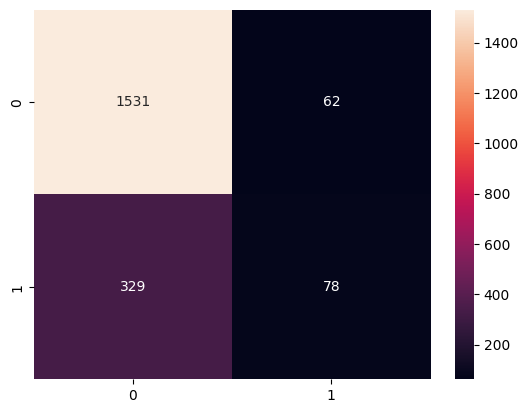

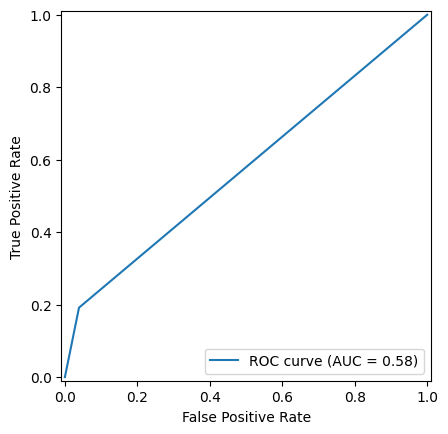

In [243]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# precision    recall  f1-score   support bular bo'yicha aniqligini chiqaradi
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred))
print("\n")
# Modelni umumiy aniqligi aniqlandi yani 87%

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()
# Confusion matrixda 0 yani mijoz qoladi degani va umumiy 1593 tadan 61 tasi xato chiqdi
# 1 yani mijoz ketib qoladi degani bunda 407 tadan 332 ta xato chiqdi bu juda yomon ko'rsatgich
# Shuning uchun ham 1 qatori recall va f1-score 55, 18, 28 % lik kam natijani chiqarayabdi

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display_viz = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display_viz.plot()
plt.show()

# Support Vector Machines

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1593
           1       0.80      0.34      0.48       407

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.70      2000
weighted avg       0.84      0.85      0.82      2000


Model aniqligi: 0.849




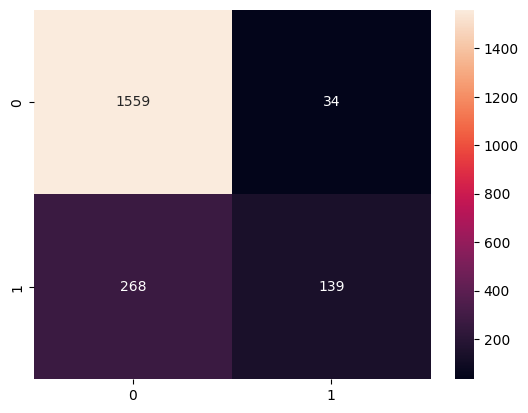

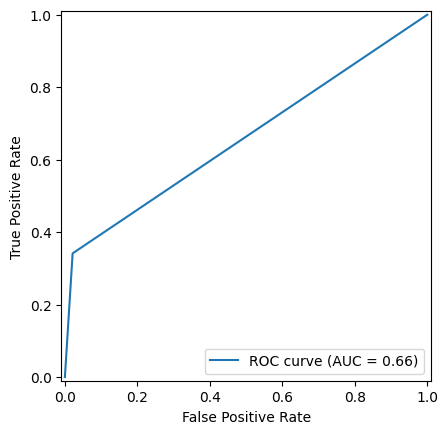

In [244]:
# Modelni yaratamiz (training)
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svc_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# precision    recall  f1-score   support bular bo'yicha aniqligini chiqaradi
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred))
print("\n")
# Modelni umumiy aniqligi aniqlandi yani 84%

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display_viz = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display_viz.plot()
plt.show()

# Decision Tree

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.50      0.50      0.50       407

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000


Model aniqligi: 0.796




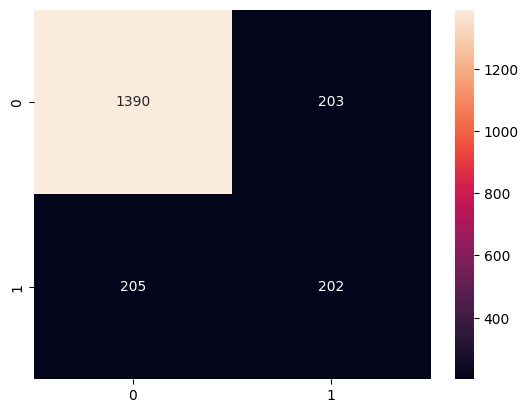

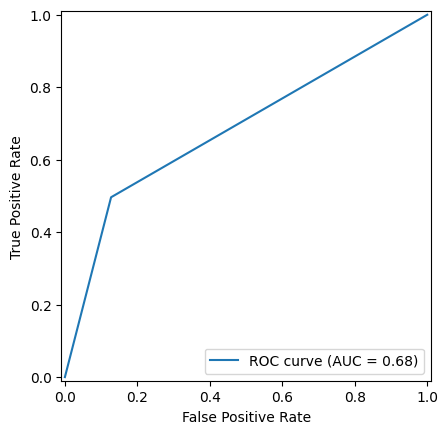

In [245]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# precision    recall  f1-score   support bular bo'yicha aniqligini chiqaradi
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred))
print("\n")
# Modelni umumiy aniqligi aniqlandi yani 84%

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display_viz = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display_viz.plot()
plt.show()

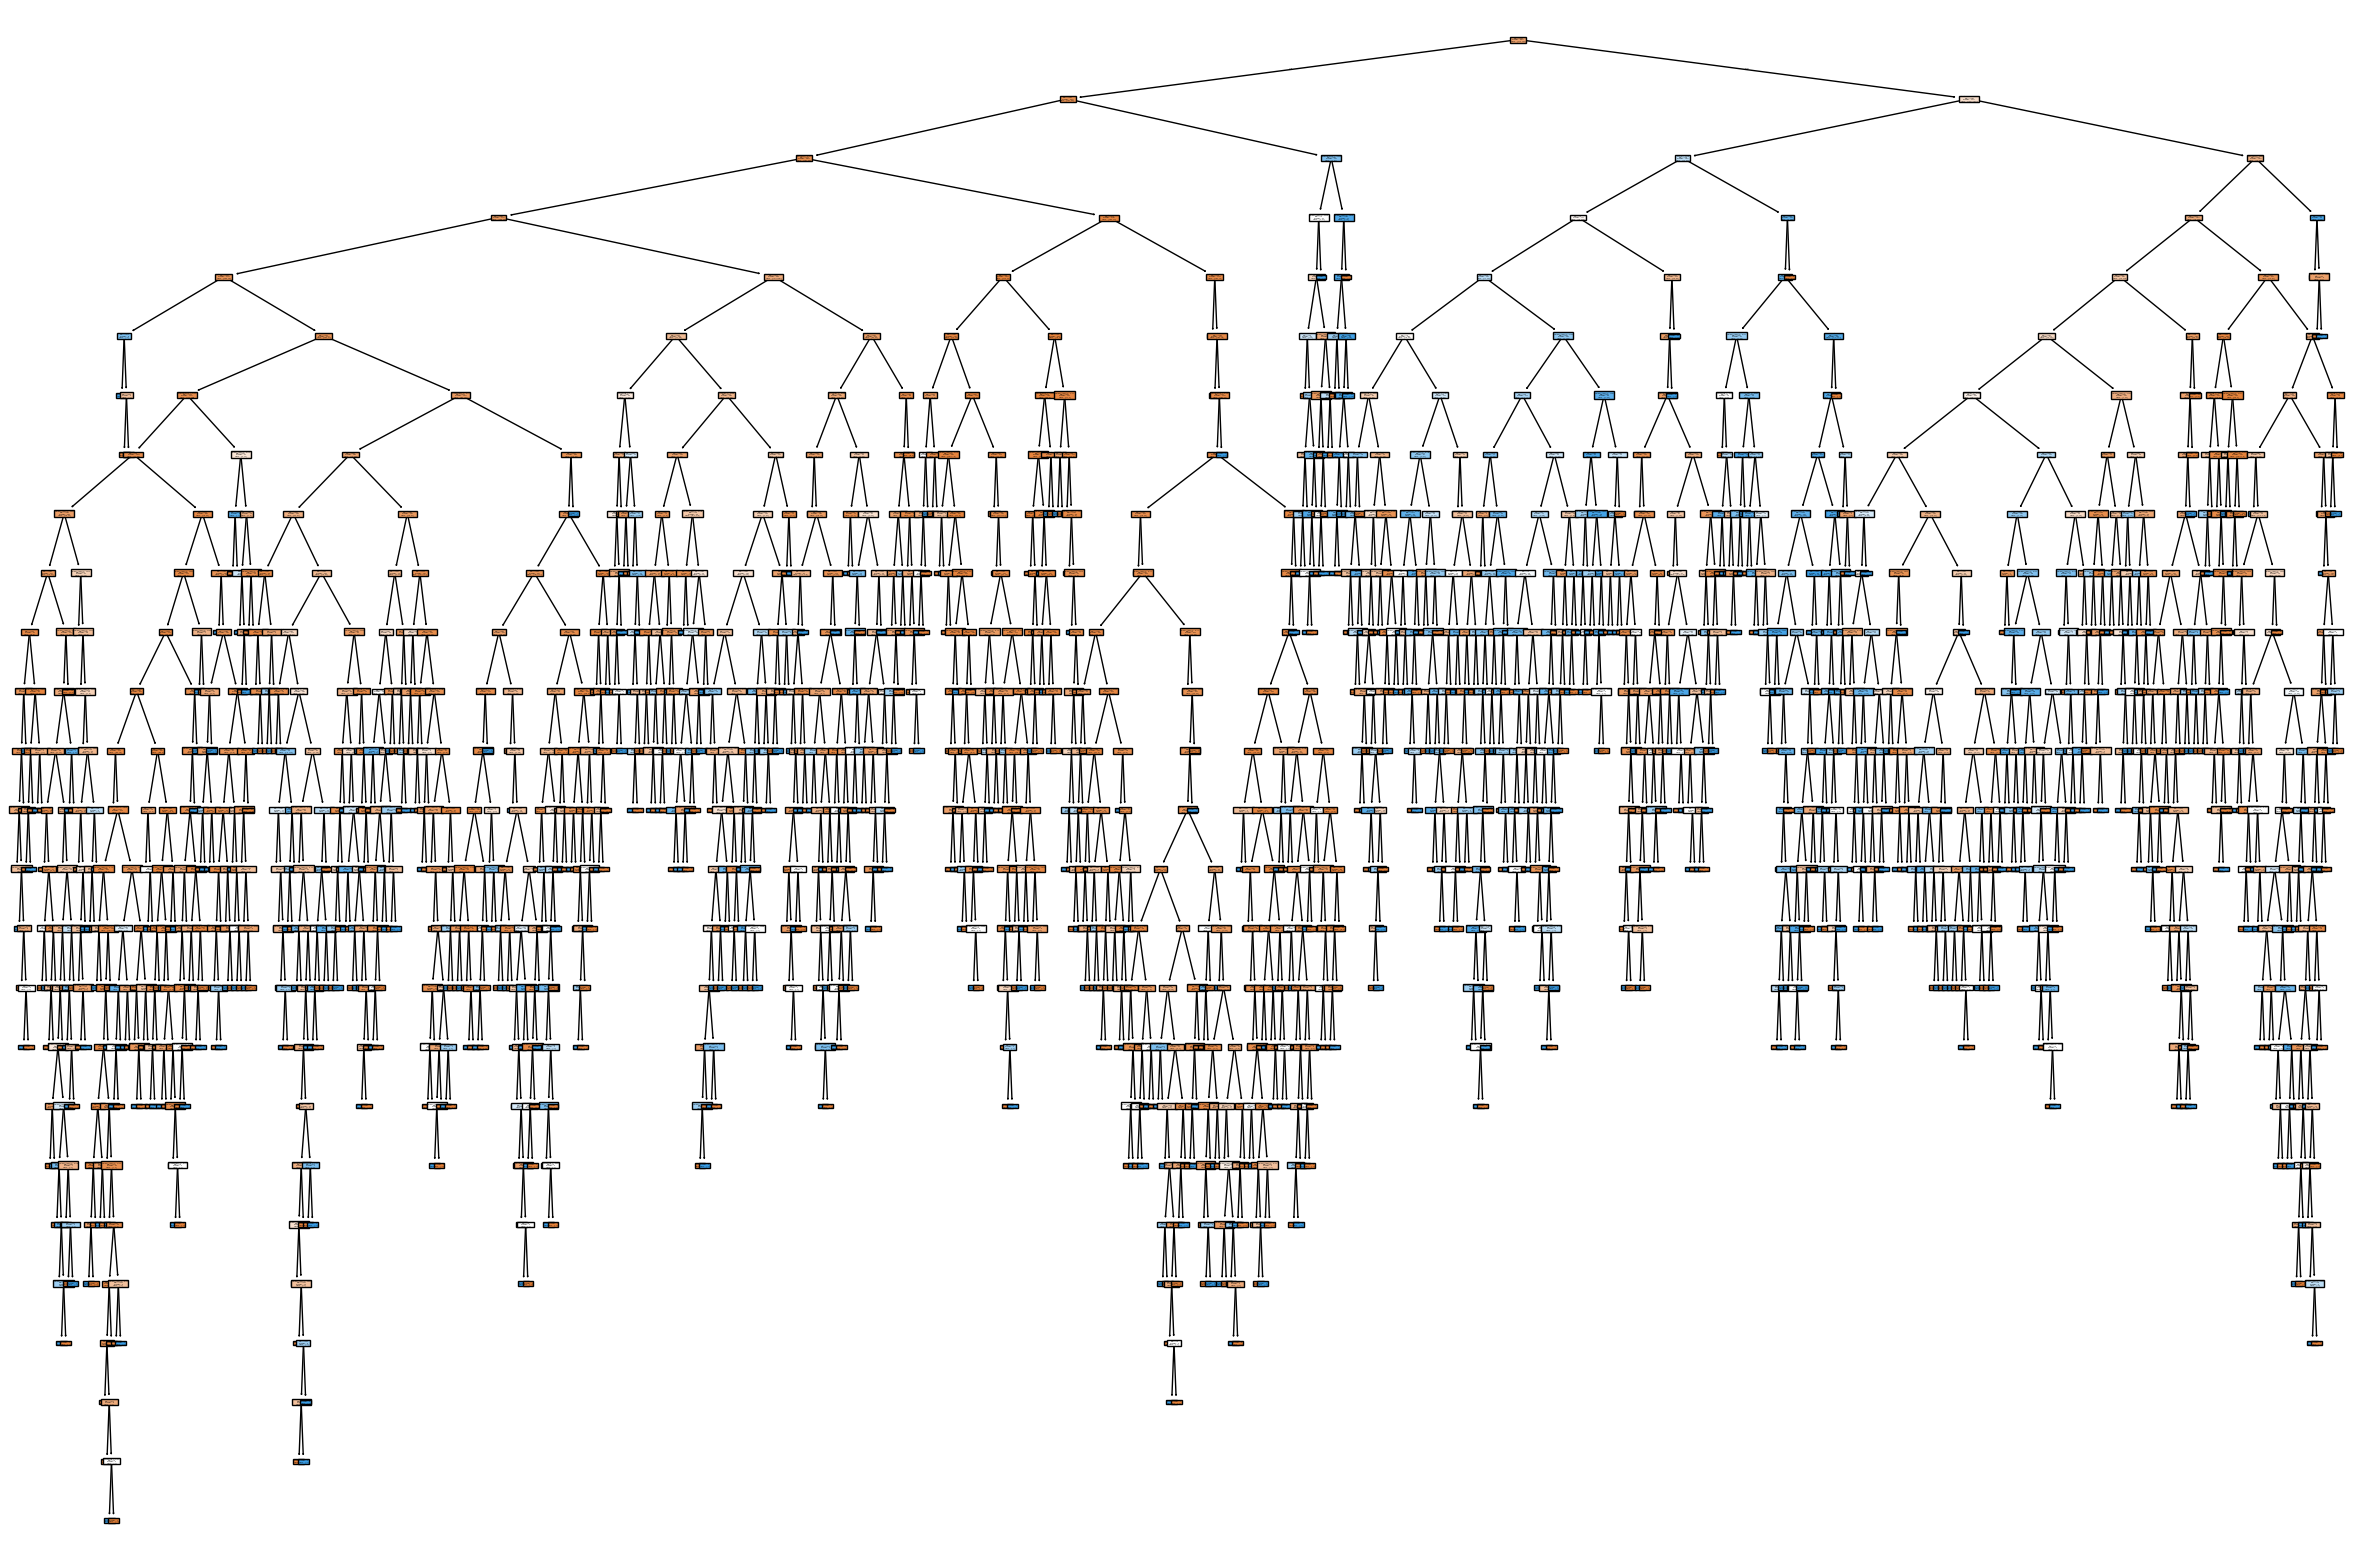

In [246]:
cols = encoded.drop("Exited", axis=1).columns
#  Bu qator encoded nomli ma'lumotlar to'plamidan (DataFrame) "Exited" ustunidan tashqari barcha ustunlarning
# nomlarini olib, cols nomli o'zgaruvchiga saqlaydi. Buni keyinchalik Decision Tree vizualizatsiyasida ustun nomlari sifatida ishlatamiz.
plt.figure(figsize=(30,20))
# parametri grafikning o'lchamini belgilaydi, ya'ni eni 30 dyuym, bo'yi 20 dyuym bo'ladi.
plot_tree(tree_model, feature_names=cols, filled=True)
# Bu qator Decision Tree modelini grafik ko'rinishida tasvirlaydi. Argumentlari quyidagilarni anglatadi:
# tree_model: Oldin o'qitilgan (train qilingan) Decision Tree modelingiz.
# feature_names=cols: Grafikka chiqariladigan ustunlar nomlarini cols o'zgaruvchisidan oladi.
# Bu har bir tugundagi qarorlar qaysi ustunga asoslanganini tushunishga yordam beradi.
# filled=True: Tugunlarni (node) asosiy sinfga qarab rangli qilib ko'rsatadi, bu esa modelning qaror qabul qilish
# jarayonini vizual tarzda tushunishni osonlashtiradi.
plt.show()

## Bundan ko'rishimiz mumkinki decision tree modelimiz juda tarvaqaylab ketdi

## Buni biz hyperparametrlar yordamida nazorat qilishimiz mumkin yani max_depth dan foydalanamiz yani bunga shoxlarini sonini berishimiz mumkin, hamda aniqlik darajasi ham o'zgaradi

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1593
           1       0.80      0.36      0.49       407

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.70      2000
weighted avg       0.84      0.85      0.83      2000


Model aniqligi: 0.851




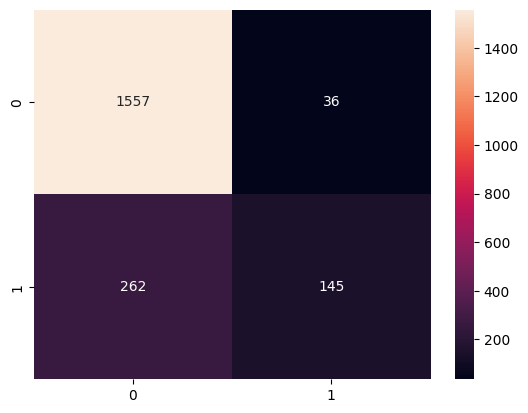

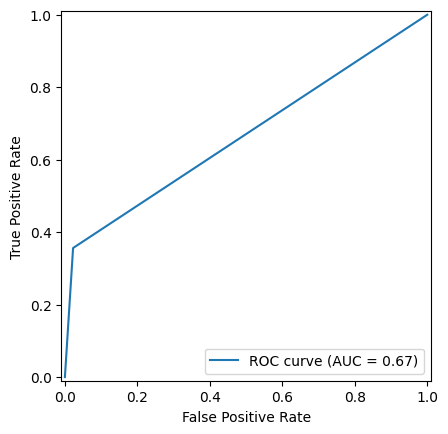

In [247]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# precision    recall  f1-score   support bular bo'yicha aniqligini chiqaradi
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred))
print("\n")
# Modelni umumiy aniqligi aniqlandi yani 84%

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display_viz = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display_viz.plot()
plt.show()

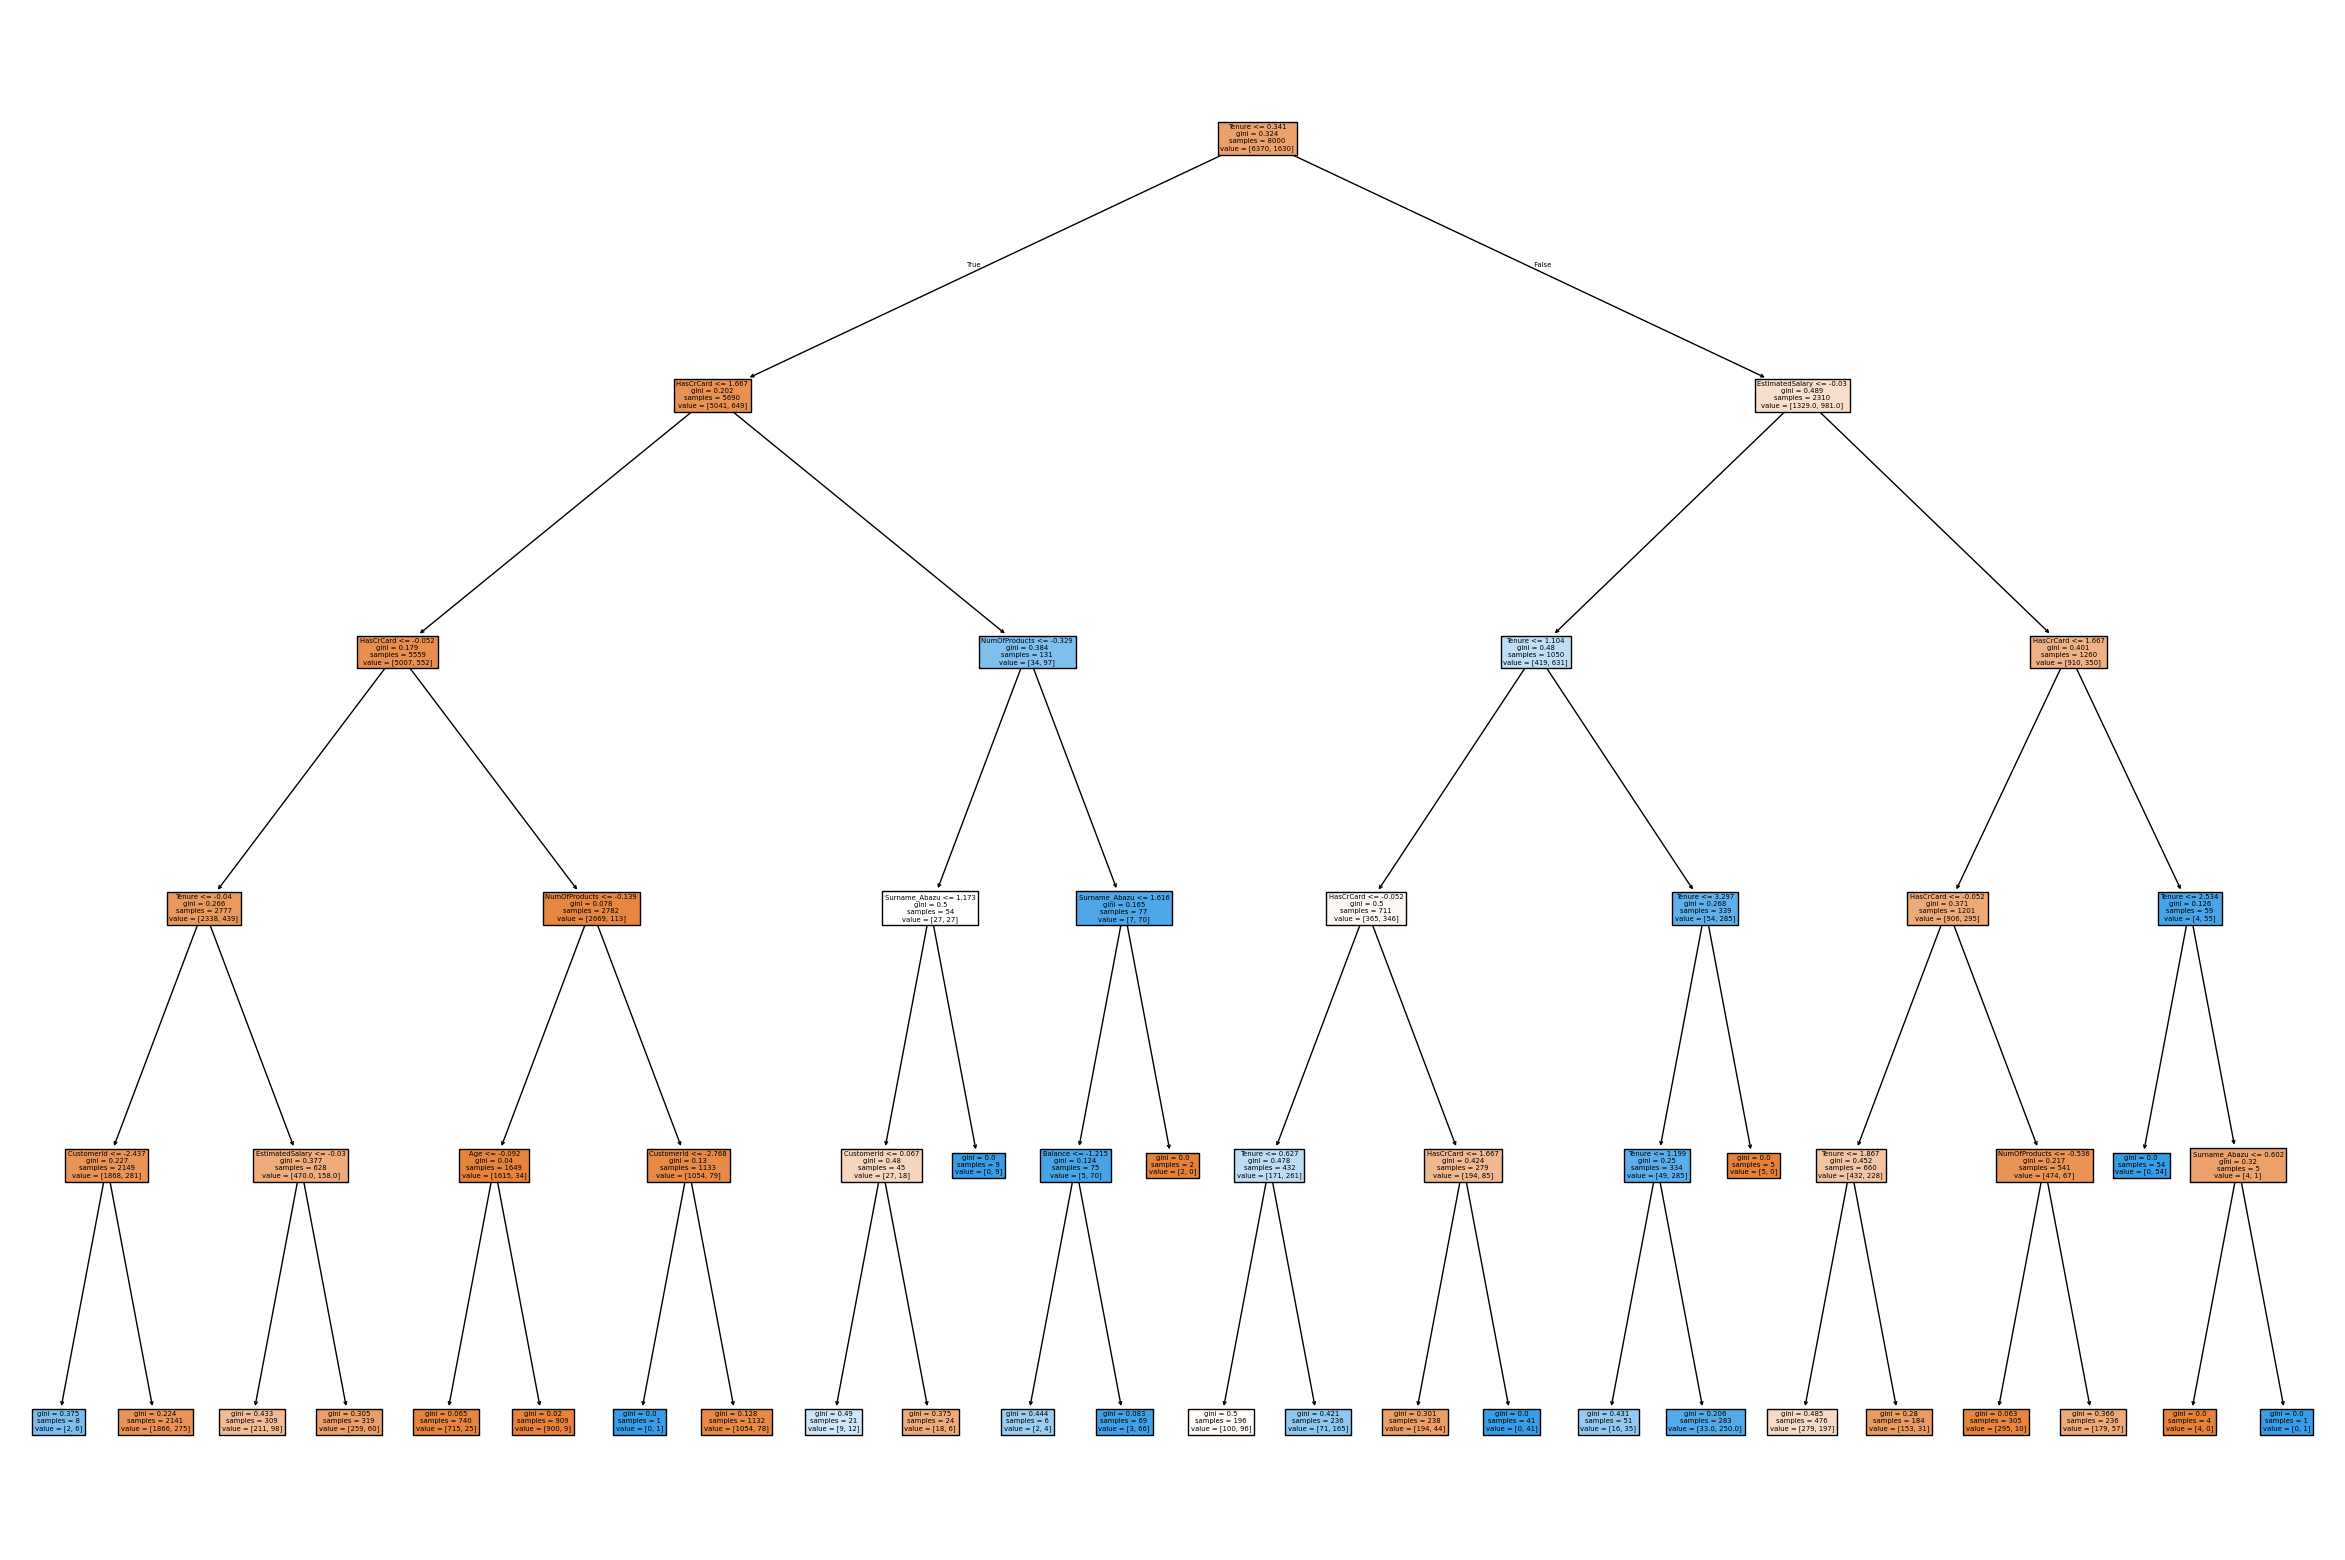

In [248]:
cols = encoded.drop("Exited", axis=1).columns
plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

## Eng yaxshi k ni topish

## for yordamida

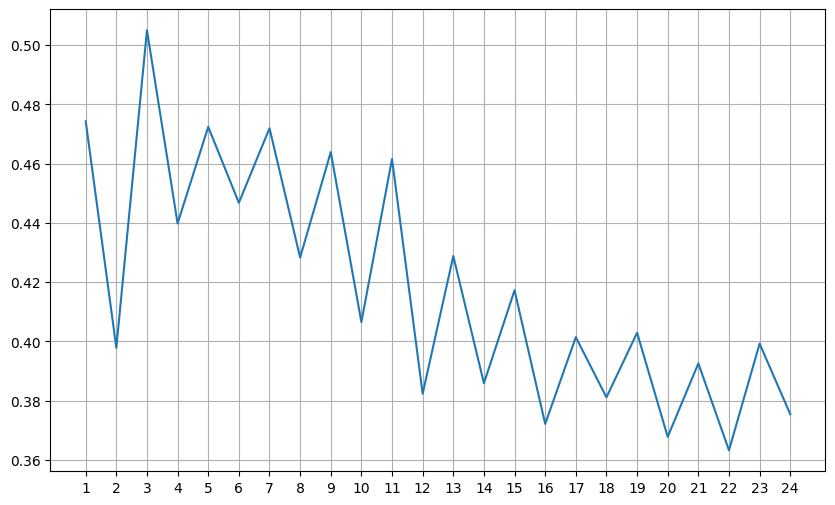

In [249]:
# from sklearn.metrics import f1_score
# from sklearn.neighbors import KNeighborsClassifier

f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

## Grid Search yordamida

In [250]:
# from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [251]:
knn_gscv.cv_results_['rank_test_score']

array([24, 22, 23, 20, 21, 19, 16, 13,  2,  3,  1,  4,  4, 12,  6,  7,  8,
       17,  9, 18, 11, 15, 10, 14], dtype=int32)

In [252]:
knn_gscv.best_params_

{'n_neighbors': np.int64(11)}

In [253]:
knn_gscv.best_score_

np.float64(0.8388)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1593
           1       0.78      0.29      0.42       407

    accuracy                           0.84      2000
   macro avg       0.81      0.63      0.66      2000
weighted avg       0.83      0.84      0.81      2000


Model aniqligi: 0.838


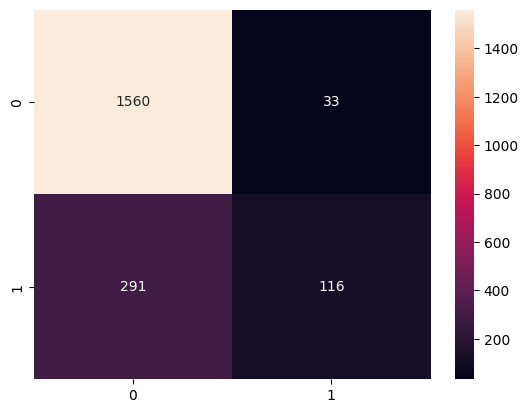

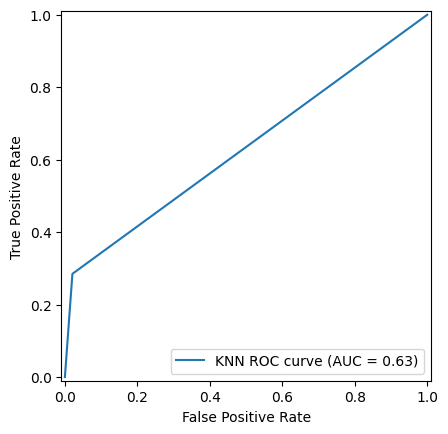

In [254]:
# Eng yaxshi 'k' qiymati bilan KNN modelini yaratamiz
knn_best_k_model = KNeighborsClassifier(n_neighbors=15)
knn_best_k_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred_knn = knn_best_k_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_knn))
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred_knn))

# Confusion matrix
conf_mat_knn = metrics.confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot=True, fmt='g')
plt.show()

# ROC curve
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_pred_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_display_viz_knn = metrics.RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn, estimator_name='KNN ROC curve')
roc_display_viz_knn.plot()
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000


Model aniqligi: 0.849




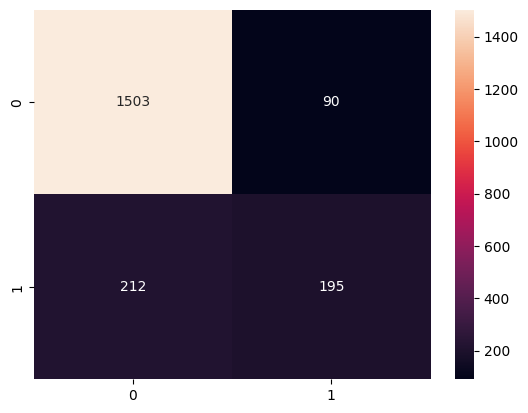

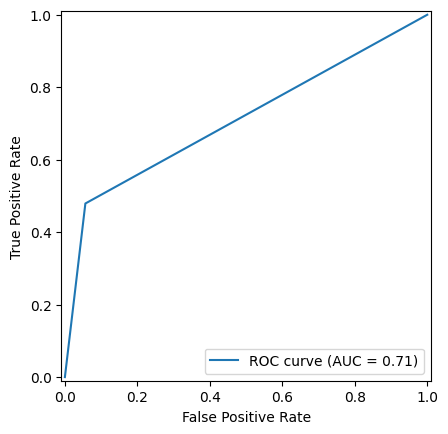

In [255]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# precision    recall  f1-score   support bular bo'yicha aniqligini chiqaradi
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred))
print("\n")
# Modelni umumiy aniqligi aniqlandi yani 84%

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display_viz = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display_viz.plot()
plt.show()

# XGBoost

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1593
           1       0.67      0.46      0.55       407

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.83      0.84      0.83      2000


Model aniqligi: 0.844




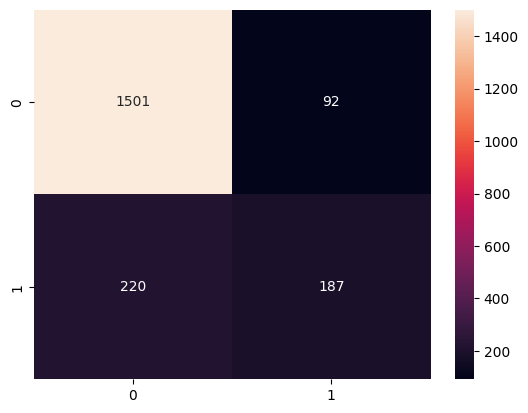

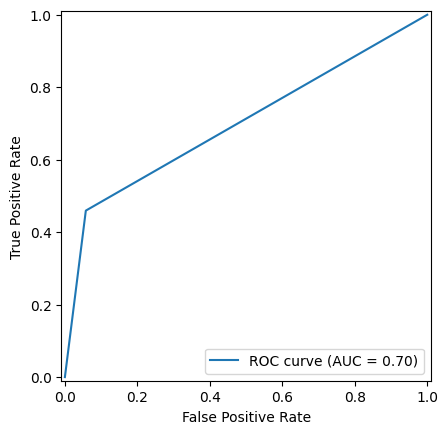

In [256]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# precision    recall  f1-score   support bular bo'yicha aniqligini chiqaradi
print("\nModel aniqligi:", metrics.accuracy_score(y_test,y_pred))
print("\n")
# Modelni umumiy aniqligi aniqlandi yani 84%

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display_viz = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display_viz.plot()
plt.show()

## Bunda modelning umumiy aniqligi ko'rsatildi va eng yaxshi natija

## Decision Tree: max_depth=5 qilganimizda ekan

### Logistic Regression: 80

### SVM: 84

### Decision Tree: 79

### Decision Tree: max_depth=5: 85

### KNN: 82

### Random Forest: 84

### XGBoost: 84

In [257]:
model_performance = {}
print("Bo'sh 'model_performance' lug'ati yaratildi.")

Bo'sh 'model_performance' lug'ati yaratildi.


##Logistic Regression model.



In [258]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression Model
model_name = 'Logistic Regression'
y_pred = LR_model.predict(X_test)
y_pred_proba = LR_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)

model_performance[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
}

print(f" {model_name} uchun: ")
for metric, value in model_performance[model_name].items():
    print(f"  {metric}: {value:.4f}")

 Logistic Regression uchun: 
  Accuracy: 0.8045
  Precision: 0.5571
  Recall: 0.1916
  F1-score: 0.2852
  AUC: 0.7546


##Support Vector Machine (SVC) model.



In [259]:
model_name = 'Support Vector Machine (SVC)'
y_pred = svc_model.predict(X_test)
y_pred_proba = svc_model.decision_function(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)

model_performance[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
}

print(f" {model_name} uchun: ")
for metric, value in model_performance[model_name].items():
    print(f"  {metric}: {value:.4f}")

 Support Vector Machine (SVC) uchun: 
  Accuracy: 0.8490
  Precision: 0.8035
  Recall: 0.3415
  F1-score: 0.4793
  AUC: 0.8228


## Decision Tree model.



In [260]:
model_name = 'Decision Tree (default)'
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)

model_performance[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
}

print(f" {model_name} uchun: ")
for metric, value in model_performance[model_name].items():
    print(f"  {metric}: {value:.4f}")

 Decision Tree (default) uchun: 
  Accuracy: 0.8510
  Precision: 0.8011
  Recall: 0.3563
  F1-score: 0.4932
  AUC: 0.8158


##Decision Tree model with `max_depth=5`



In [261]:
model_name = 'Decision Tree (max_depth=5)'
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)

model_performance[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
}

print(f" {model_name} uchun: ")
for metric, value in model_performance[model_name].items():
    print(f"  {metric}: {value:.4f}")

 Decision Tree (max_depth=5) uchun: 
  Accuracy: 0.8510
  Precision: 0.8011
  Recall: 0.3563
  F1-score: 0.4932
  AUC: 0.8158


##KNeighborsClassifier model.



In [262]:
model_name = 'KNeighborsClassifier'
y_pred = knn_best_k_model.predict(X_test)
y_pred_proba = knn_best_k_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)

model_performance[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
}

print(f"{model_name} uchun: ")
for metric, value in model_performance[model_name].items():
    print(f"  {metric}: {value:.4f}")

KNeighborsClassifier uchun: 
  Accuracy: 0.8380
  Precision: 0.7785
  Recall: 0.2850
  F1-score: 0.4173
  AUC: 0.8164


##Random Forest model.



In [263]:
model_name = 'Random Forest'
y_pred = RF_model.predict(X_test)
y_pred_proba = RF_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)

model_performance[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
}

print(f"{model_name} uchun: ")
for metric, value in model_performance[model_name].items():
    print(f"  {metric}: {value:.4f}")

Random Forest uchun: 
  Accuracy: 0.8490
  Precision: 0.6842
  Recall: 0.4791
  F1-score: 0.5636
  AUC: 0.8158


## XGBoost model.



In [264]:
model_name = 'XGBoost'
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)

model_performance[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
}

print(f"{model_name} uchun: ")
for metric, value in model_performance[model_name].items():
    print(f"  {metric}: {value:.4f}")

XGBoost uchun: 
  Accuracy: 0.8440
  Precision: 0.6703
  Recall: 0.4595
  F1-score: 0.5452
  AUC: 0.8291


## Barcha modellar uchun df ko'rinishida

In [265]:
metrics_df = pd.DataFrame(model_performance).T
print("Barcha modellar uchun df ko'rinishida:")
display(metrics_df)

Barcha modellar uchun df ko'rinishida:


,Accuracy,Precision,Recall,F1-score,AUC
Logistic Regression,0.8045,0.557143,0.191646,0.285192,0.754639
Support Vector Machine (SVC),0.8490,0.803468,0.341523,0.479310,0.822835
Decision Tree (default),0.8510,0.801105,0.356265,0.493197,0.815816
Decision Tree (max_depth=5),0.8510,0.801105,0.356265,0.493197,0.815816
KNeighborsClassifier,0.8380,0.778523,0.285012,0.417266,0.816380
Random Forest,0.8490,0.684211,0.479115,0.563584,0.815840
XGBoost,0.8440,0.670251,0.459459,0.545190,0.829088


## Eng yaxshi modelni aniqlash va tahlil qilish tartib bo'yicha joylashtirildi umumiy hisobda eng yaxshisi XGBoost ekan




In [266]:
display(metrics_df.sort_values(by='AUC', ascending=False))

,Accuracy,Precision,Recall,F1-score,AUC
XGBoost,0.8440,0.670251,0.459459,0.545190,0.829088
Support Vector Machine (SVC),0.8490,0.803468,0.341523,0.479310,0.822835
KNeighborsClassifier,0.8380,0.778523,0.285012,0.417266,0.816380
Random Forest,0.8490,0.684211,0.479115,0.563584,0.815840
Decision Tree (default),0.8510,0.801105,0.356265,0.493197,0.815816
Decision Tree (max_depth=5),0.8510,0.801105,0.356265,0.493197,0.815816
Logistic Regression,0.8045,0.557143,0.191646,0.285192,0.754639
